In [96]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix as cs
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = joblib.load('training_data.sav')

In [3]:
categorical_features = ['sex',
                        'tht',
                        'trok',
                        'taflp',
                        'taflk',
                        'tdiab',
                        'tangina',
                        'thjan',
                        'tcarotis', 
                       'taovent',
                       'tsivil',
                       'mrs',
                        'utoast',
                        'tpleie',
                        'tidklass',
                        'umrutf',
                        'bivt', 
                        'bia', 
                        'bcarotis', 
                        'bpl', 
                        'basa', 
                        'bhepl', 
                        'bheph', 
                        'tcvtia', 
                        'tdvt', 
                        'tdepr', 
                        'tdyslip'
                       ]

In [4]:
fillna_dict = {'tht': 'nei',
               'trok':  'Aldrirøyker',
               'taflp': 'nei', 
               'taflk': 'nei',
               'tdiab': 'nei',
               'tangina': 'nei',
               'thjan': 'nei',
               'tcarotis': 0, 
                'taovent': 'nei',
              'tsivil': 'nei',
                 'mrs': 'Unknown',
               'utoast': 'Ukjent årsak/ikke utfylt',
            'tpleie': 'Unknown',
               'tidklass': 'Annet',
               'umrutf': 'Nei',
               'bivt': 'Nei', 
               'bia': 'Nei', 
               'bcarotis': 0, 
               'bpl': 'Nei', 
               'basa': 'Nei', 
               'bhepl': 'Nei', 
               'bheph': 'Nei', 
               'tcvtia': 'Nei', 
               'tdvt': 0, 
               'tdepr': 'Nei', 
               'tdyslip': 0
               }

In [5]:
df['mrs'].value_counts()

Lette symptomer, men i stand til å utføre alle vanlige aktiviteter         1016
Kan ikke gå uten hjelp, trenger hjelp i daglige aktiviteter (basic ADL)     916
Ingen symptomer og ingen begrensninger i dagliglivet                        735
Begrensninger i sosiale aktiviteter, men uavhengig i ADL                    728
Har behov for noe hjelp (instrumental ADL), men kan gå uten hjelp           613
Sengeliggende, inkontinent, avhengig av kontinuerlig hjelp                  291
Død                                                                         133
Name: mrs, dtype: int64

In [6]:
print(df.shape)
df = df[df['mrs']!='Død']
print(df.shape)

(4432, 1644)
(4299, 1644)


In [7]:
for cat in categorical_features:
    print(cat,df[cat].unique(), df[cat].isna().sum())
    if df[cat].isna().sum()!=0:
        df[cat] = df[cat].fillna(fillna_dict[cat])
df[categorical_features].isna().sum().sum()

sex ['Female' 'Male'] 0
tht ['nei' 'ja' nan] 9
trok ['Aldrirøyker' nan 'Dagligrøyker' 'Tidligere røyker'] 221
taflp ['nei' 'ja' nan] 31
taflk ['nei' 'ja' nan] 28
tdiab ['nei' 'ja' nan] 34
tangina ['nei' 'ja' nan] 14
thjan ['nei' 'ja' nan] 33
tcarotis [ 0. nan  1.] 2220
taovent ['nei' 'ja' nan] 30
tsivil ['ja' 'nei' nan] 42
mrs ['Kan ikke gå uten hjelp, trenger hjelp i daglige aktiviteter (basic ADL)'
 'Har behov for noe hjelp (instrumental ADL), men kan gå uten hjelp'
 'Begrensninger i sosiale aktiviteter, men uavhengig i ADL'
 'Lette symptomer, men i stand til å utføre alle vanlige aktiviteter'
 'Ingen symptomer og ingen begrensninger i dagliglivet'
 'Sengeliggende, inkontinent, avhengig av kontinuerlig hjelp'] 0
utoast ['Ukjent årsak/ikke utfylt' 'Småkarsykdom (mulig)'
 'Kardial emboli (mulig)' 'Kardial emboli (sannsynlig)'
 'Annen årsak (sannsynlig)' 'Småkarsykdom (sannsynlig)'
 'Aterosklerose (sannsynlig)' nan 'Aterosklerose (mulig)'
 'Annen årsak (mulig)'] 22
tpleie ['Omsorgsbolig

0

In [8]:
numerical_features = ['age','nihssinn','obarttotal','blhb','blkrea', 'blna', 'blk', 'blkol']

In [9]:
df.age.quantile(0.05)

43.6054771

In [10]:
df[numerical_features].describe()

age     nihssinn   obarttotal         blhb       blkrea  \
count  4299.000000  4239.000000  3632.000000  4248.000000  4249.000000   
mean     70.722774     4.892663    74.500551    14.129967    86.369263   
std      15.002293     6.003424    36.163701     1.693773    42.259828   
min      15.189596     0.000000     0.000000     0.000000    29.000000   
25%      60.767967     1.000000    53.750000    13.200000    66.000000   
50%      72.835045     3.000000    95.000000    14.300000    78.000000   
75%      82.424366     6.000000   100.000000    15.300000    95.000000   
max      99.838470    33.000000   770.000000    26.900000   879.000000   

              blna          blk        blkol  
count  4250.000000  4103.000000  3947.000000  
mean    139.693647     4.093444     5.268356  
std       3.682988     0.595807     1.347177  
min     111.000000     2.100000     1.400000  
25%     138.000000     3.800000     4.300000  
50%     140.000000     4.100000     5.200000  
75%     141.000000     4.300000     6.200000  
max     264.000000    23.700000    21.000000

In [11]:
df[numerical_features].isna().sum()

age             0
nihssinn       60
obarttotal    667
blhb           51
blkrea         50
blna           49
blk           196
blkol         352
dtype: int64

In [12]:
df['obarttotal'] = df['obarttotal'].fillna(100) # Almost all of them have "Yes" in obertnormal, which leads to 100 (medical evaluation) 
df['nihssinn'] = df['nihssinn'].fillna(7) # Assumed to be bigger than average (Chosen 75% quantile of nihssinn value)
df['blhb'] = df['blhb'].fillna(14.043169) # average 
for num in ['blkrea', 'blna', 'blk', 'blkol']:
    df[num] = df[num].fillna(df[numerical_features].describe()[num]['mean'])

In [ ]:
df['reoccurence']=np.where(df.slagt_y=='No stroke',0,1)

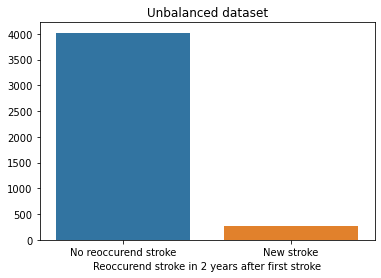

In [108]:
labels= ['No reoccurend stroke','New stroke']
X_axis = np.arange(len(labels))
sns.countplot(x=df['2nd_stroke_in_2years'])
plt.xticks(X_axis, labels )
plt.xlabel('Reoccurend stroke in 2 years after first stroke')
plt.ylabel("")
plt.title("Unbalanced dataset")
#plt.legend()
plt.show()

In [13]:
enc = OneHotEncoder(drop=None, handle_unknown = 'ignore', sparse=False)
enc.fit(df[categorical_features])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [14]:
print(df[categorical_features].shape)
df_cat_oh = enc.transform(df[categorical_features])
df_cat_oh = pd.DataFrame(df_cat_oh, columns=enc.get_feature_names(categorical_features), index=df.index)
print(df_cat_oh.shape)

(4299, 27)
(4299, 82)


In [15]:
df_total_X = pd.concat([df_cat_oh, df[numerical_features]],axis=1)
print(df_total_X.shape)
#df_total = pd.concat([df_total, df['reoccurence']],axis=1)
#print(df_total.shape)

(4299, 90)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_total_X, df['2nd_stroke_in_2years'], 
                                                    test_size=0.20, random_state=42,
                                                   stratify=df['2nd_stroke_in_2years'])

In [ ]:
joblib.dump(X_train,'X_train.sav')
joblib.dump(X_test,'X_test.sav')
joblib.dump(y_train,'y_train.sav')
joblib.dump(y_test,'y_test.sav')

In [ ]:
X_train = joblib.load('X_train.sav')
X_test = joblib.load('X_test.sav')
y_train = joblib.load('y_train.sav')
y_test = joblib.load('y_test.sav')

In [127]:
clf = RandomForestClassifier(max_features=15,max_depth=15, n_estimators=300,class_weight={1: 9})
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight={1: 30}, max_depth=15, max_features=15,
                       n_estimators=300)

In [128]:
pred_train = clf.predict(X_train)
pred_train.sum()

315

In [ ]:
print(accuracy_score(y_train,pred_train))
cs(y_train,pred_train)

In [ ]:
pred_test = clf.predict(X_test)
print(pred_test.sum(), accuracy_score(y_test,pred_test))
cs(y_test,pred_test)

## Feature importance

In [131]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

Text(0, 0.5, '')

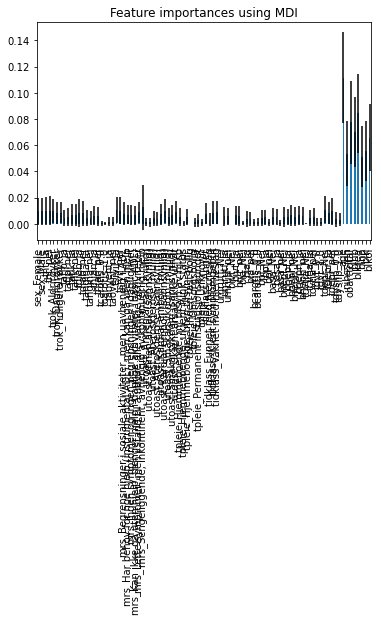

In [132]:
forest_importances = pd.Series(importances, index=list(X_train))

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("")
#fig.tight_layout()

In [133]:
feat_imp_dict = {}
for cat in categorical_features:
    feat_imp_dict[cat]=0
    cat_search=cat+'_'
    for ind in forest_importances.index:
        if cat_search in ind:
            feat_imp_dict[cat]+=forest_importances.loc[ind]

In [134]:
forest_importances_num = forest_importances.loc[numerical_features]

In [135]:
for a in feat_imp_dict:
    forest_importances_num = forest_importances_num.append(pd.Series([feat_imp_dict[a]],index=[a]))

Text(0, 0.5, '')

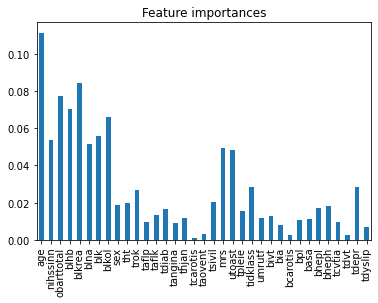

In [137]:
#forest_importances = pd.Series(importances, index=list(X_train))

fig, ax = plt.subplots()
forest_importances_num.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("")
#fig.tight_layout()

In [ ]:
forest_importances[forest_importances >0.04]

In [ ]:
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Shap analysis for blkrea

In [28]:
import shap 

In [29]:
explainer = shap.TreeExplainer(clf)

In [38]:
choosen_instance = X_test.iloc[:]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)